In [7]:
import pandas as pd

pd.__version__

'2.2.2'

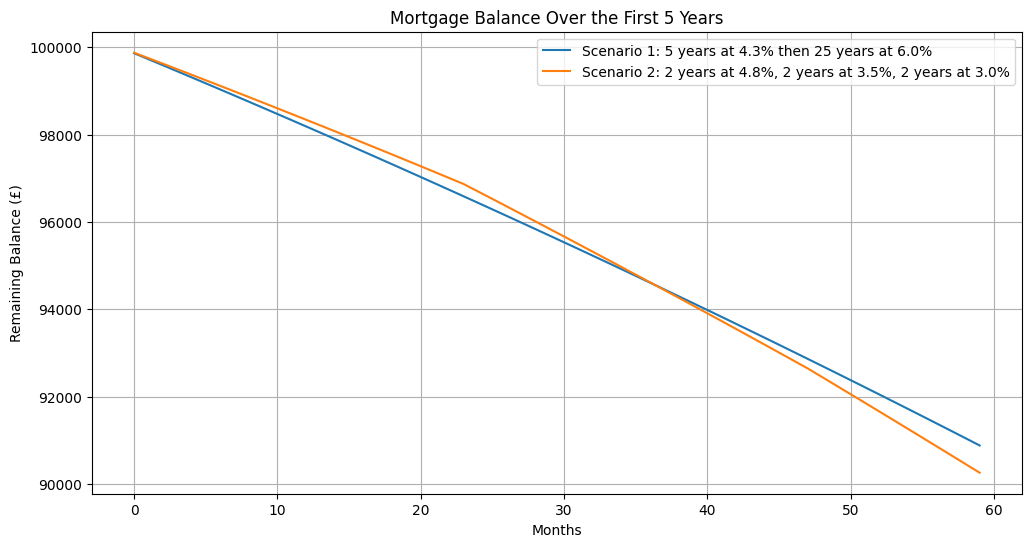

In [17]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

def calculate_balance(principal, term_years, interest_rates, period_years):
    term_months = term_years * 12
    balances = []
    current_balance = principal
    start_month = 0
    
    for rate, years in zip(interest_rates, period_years):
        monthly_rate = rate / 100 / 12
        period_months = years * 12
        remaining_term = term_months - start_month
        
        if current_balance <= 0:
            break
        
        # Calculate the monthly payment for the current period
        monthly_payment = npf.pmt(monthly_rate, remaining_term, -current_balance)
        
        for month in range(period_months):
            interest_payment = current_balance * monthly_rate
            principal_payment = monthly_payment - interest_payment
            current_balance -= principal_payment
            balances.append(current_balance)
            start_month += 1
            
            if current_balance <= 0:
                break

    while start_month < term_months and current_balance > 0:
        interest_payment = current_balance * monthly_rate
        principal_payment = monthly_payment - interest_payment
        current_balance -= principal_payment
        balances.append(current_balance)
        start_month += 1
    
    return balances

# Scenario 1
principal = 100000
term_years = 30
interest_rates_1 = [4.3, 6.0]
period_years_1 = [5, 25]  # 5 years fixed, then remaining 25 years

balance_scenario_1 = calculate_balance(principal, term_years, interest_rates_1, period_years_1)

# Scenario 2
interest_rates_2 = [4.8, 3.5, 3.0, 6.0]
period_years_2 = [2, 2, 2, 24]  # 2 years fixed at 4.8%, 2 years at 3.5%, 2 years at 3.0%, then remaining 24 years

balance_scenario_2 = calculate_balance(principal, term_years, interest_rates_2, period_years_2)

# Limit to the first 60 months (5 years)
months = np.arange(60)

plt.figure(figsize=(12, 6))
plt.plot(months, balance_scenario_1[:60], label="Scenario 1: 5 years at 4.3% then 25 years at 6.0%")
plt.plot(months, balance_scenario_2[:60], label="Scenario 2: 2 years at 4.8%, 2 years at 3.5%, 2 years at 3.0%")

plt.title("Mortgage Balance Over the First 5 Years")
plt.xlabel("Months")
plt.ylabel("Remaining Balance (£)")
plt.legend()
plt.grid(True)
plt.show()


Remaining balance after 5 years for Scenario 1: £90878.54
Remaining balance after 5 years for Scenario 2: £90253.94
Remaining balance after 5 years for Scenario 3: £92114.88


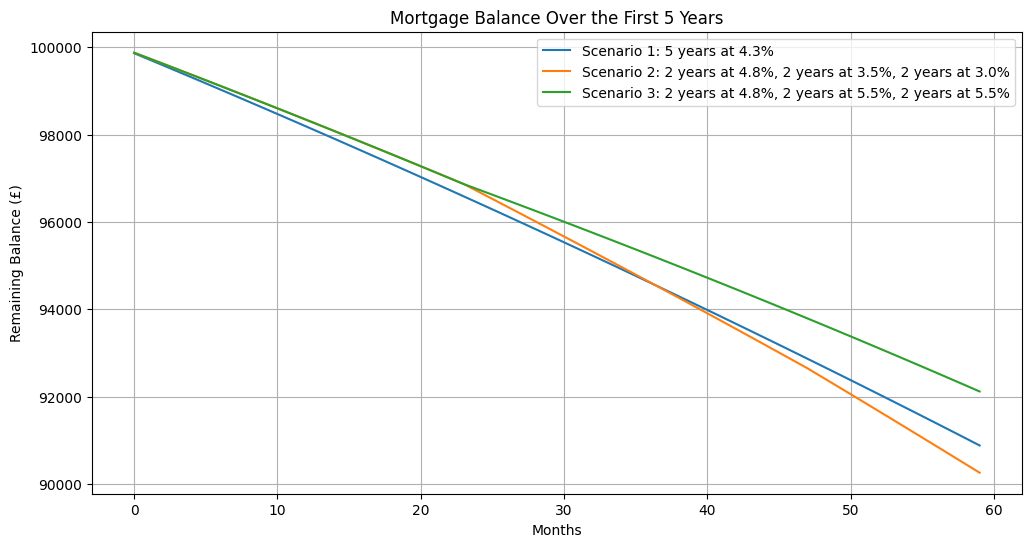

In [22]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

def calculate_balance(principal, term_years, interest_rates, period_years):
    term_months = term_years * 12
    balances = []
    current_balance = principal
    start_month = 0
    
    for rate, years in zip(interest_rates, period_years):
        monthly_rate = rate / 100 / 12
        period_months = years * 12
        remaining_term = term_months - start_month
        
        if current_balance <= 0:
            break
        
        # Calculate the monthly payment for the current period
        monthly_payment = npf.pmt(monthly_rate, remaining_term, -current_balance)
        
        for month in range(period_months):
            interest_payment = current_balance * monthly_rate
            principal_payment = monthly_payment - interest_payment
            current_balance -= principal_payment
            balances.append(current_balance)
            start_month += 1
            
            if current_balance <= 0:
                break

    while start_month < term_months and current_balance > 0:
        interest_payment = current_balance * monthly_rate
        principal_payment = monthly_payment - interest_payment
        current_balance -= principal_payment
        balances.append(current_balance)
        start_month += 1
    
    return balances

# Scenario 1
principal = 100000
term_years = 30
interest_rates_1 = [4.3, 6.0]
period_years_1 = [5, 25]  # 5 years fixed, then remaining 25 years

balance_scenario_1 = calculate_balance(principal, term_years, interest_rates_1, period_years_1)

# Scenario 2
interest_rates_2 = [4.8, 3.5, 3.0, 6.0]
period_years_2 = [2, 2, 2, 24]  # 2 years fixed at 4.8%, 2 years at 3.5%, 2 years at 3.0%, then remaining 24 years

balance_scenario_2 = calculate_balance(principal, term_years, interest_rates_2, period_years_2)

# Scenario 3 (New Scenario)
interest_rates_3 = [4.8, 5.5, 5.5, 6.0]
period_years_3 = [2, 2, 2, 24]  # 2 years fixed at 4.8%, 2 years at 5.5%, 2 years at 5.5%, then remaining 24 years

balance_scenario_3 = calculate_balance(principal, term_years, interest_rates_3, period_years_3)

# Calculate remaining balance after 5 years (60 months)
remaining_balance_1 = balance_scenario_1[59] if len(balance_scenario_1) > 59 else "Not available"
remaining_balance_2 = balance_scenario_2[59] if len(balance_scenario_2) > 59 else "Not available"
remaining_balance_3 = balance_scenario_3[59] if len(balance_scenario_3) > 59 else "Not available"

print(f"Remaining balance after 5 years for Scenario 1: £{remaining_balance_1:.2f}")
print(f"Remaining balance after 5 years for Scenario 2: £{remaining_balance_2:.2f}")
print(f"Remaining balance after 5 years for Scenario 3: £{remaining_balance_3:.2f}")

# Plotting the balance over the first 5 years
months = np.arange(60)

plt.figure(figsize=(12, 6))
plt.plot(months, balance_scenario_1[:60], label="Scenario 1: 5 years at 4.3%")
plt.plot(months, balance_scenario_2[:60], label="Scenario 2: 2 years at 4.8%, 2 years at 3.5%, 2 years at 3.0%")
plt.plot(months, balance_scenario_3[:60], label="Scenario 3: 2 years at 4.8%, 2 years at 5.5%, 2 years at 5.5%")

plt.title("Mortgage Balance Over the First 5 Years")
plt.xlabel("Months")
plt.ylabel("Remaining Balance (£)")
plt.legend()
plt.grid(True)
plt.show()
